In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression

import math
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
data = pd.read_csv(r'C:\Users\hp1\Downloads\archive\House_Rent_Dataset.csv')
print(data.head())

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

In [3]:
data.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [22]:
data.isnull().sum() 

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

C:\Users\hp1\AppData\Local\Temp\ipykernel_19668\3424273148.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('City').agg('sum')[['Rent']].plot(kind='bar',figsize=(10, 5),stacked=True)


<AxesSubplot: xlabel='City'>

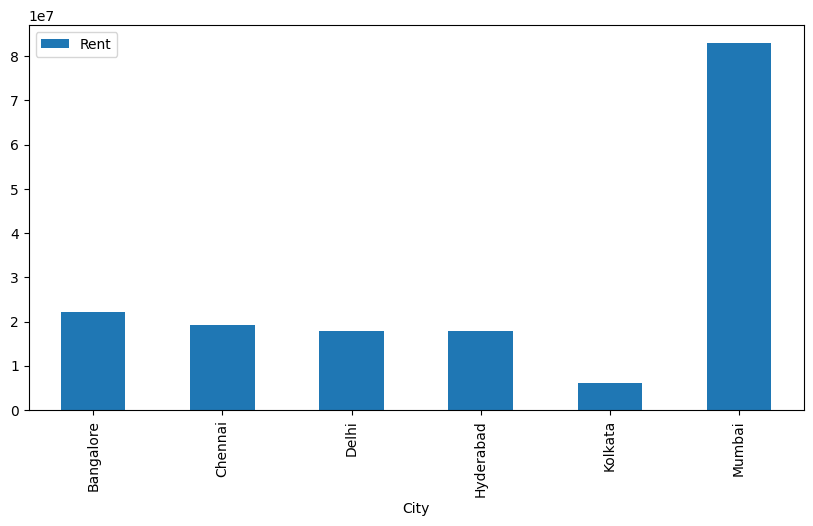

In [23]:
data.groupby('City').agg('sum')[['Rent']].plot(kind='bar',figsize=(10, 5),stacked=True)

<AxesSubplot: xlabel='Size', ylabel='Rent'>

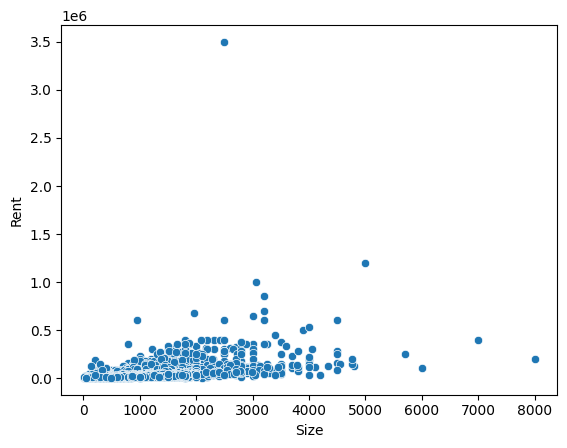

In [24]:
sns.scatterplot(x="Size", y="Rent", data=data)

In [25]:
mean_Kolkata=data[data['City']=='Kolkata']['Rent'].mean()
mean_Mumbai=data[data['City']=='Mumbai']['Rent'].mean()
mean_Bangalore=data[data['City']=='Bangalore']['Rent'].mean()
mean_delhi=data[data['City']=='Delhi']['Rent'].mean()
mean_Chennai=data[data['City']=='Chennai']['Rent'].mean()
mean_Hyderabad=data[data['City']=='Hyderabad']['Rent'].mean()

In [26]:
print("Kolkata average rent is",mean_Kolkata)
print("Mumbai average rent is",mean_Mumbai)
print("Bangalore average rent is",mean_Bangalore)
print("Delhi average rent is",mean_delhi)
print("Chennai average rent is",mean_Chennai)
print("Hyderabad average rent is",mean_Hyderabad)

Kolkata average rent is 11645.173664122138
Mumbai average rent is 85321.20473251029
Bangalore average rent is 24966.365688487585
Delhi average rent is 29461.98347107438
Chennai average rent is 21614.092031425364
Hyderabad average rent is 20555.048387096773


In [27]:
data["Area Type"] = data["Area Type"].map({"Super Area": 1, 
                                           "Carpet Area": 2, 
                                           "Built Area": 3})
data["City"] = data["City"].map({"Mumbai": 4000, "Chennai": 6000, 
                                 "Bangalore": 5600, "Hyderabad": 5000, 
                                 "Delhi": 1100, "Kolkata": 7000})
data["Furnishing Status"] = data["Furnishing Status"].map({"Unfurnished": 0, 
                                                           "Semi-Furnished": 1, 
                                                           "Furnished": 2})
data["Tenant Preferred"] = data["Tenant Preferred"].map({"Bachelors/Family": 2, 
                                                         "Bachelors": 1, 
                                                         "Family": 3})

In [28]:
df = pd.DataFrame(data)

x = df[["BHK", "Size", "Area Type", "City", 
                   "Furnishing Status", "Tenant Preferred", 
                   "Bathroom"]]

y = df[['Rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=42)

lm = LinearRegression()

model = lm.fit(x_train, y_train)

y_predict= lm.predict(x_test)



print("Test score:")
print(lm.score(x_test, y_test))


Test score:
0.41076444598387685


In [29]:
df2 = pd.DataFrame(data=y_predict,columns=["Predicted Rent"])

In [30]:
df2

,Predicted Rent
0,21534.745840
1,22175.235538
2,39837.846564
3,94338.271111
4,139374.771272
...,...
945,54951.027335
946,18470.508938
947,17513.498240
948,24373.587497


In [31]:
df3=y_test

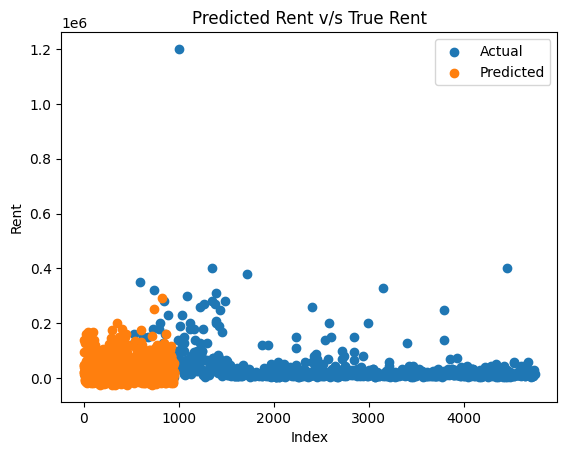

In [32]:
plt.scatter(y=df3['Rent'],x=df3.index)
plt.scatter(y=df2['Predicted Rent'],x=df2.index)
plt.title("Predicted Rent v/s True Rent")
plt.legend(['Actual','Predicted'])
plt.xlabel("Index")
plt.ylabel("Rent")
plt.show()

In [33]:
print("Root Mean Absolute Error: %.2f" % np.sqrt(np.mean(np.absolute(y_predict - y_test))))

Root Mean Absolute Error: 156.96


c:\Users\hp1\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [34]:
y_train

,Rent
1995,23500
1497,10500
2763,19000
1351,20000
1862,17000
...,...
4426,25000
466,20000
3092,20000
3772,85000


In [35]:
x_test

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
1566,2,1100,1,5600,0,2,2
3159,2,800,1,6000,2,2,2
538,2,518,2,4000,1,2,2
2630,3,1500,2,1100,0,2,3
4418,3,2235,2,5000,0,3,5
...,...,...,...,...,...,...,...
4124,2,1248,2,5000,1,2,2
3400,3,1100,1,6000,0,2,2
1941,2,950,1,5600,0,2,2
3679,3,1125,1,6000,1,2,2


In [36]:
y_train

,Rent
1995,23500
1497,10500
2763,19000
1351,20000
1862,17000
...,...
4426,25000
466,20000
3092,20000
3772,85000


In [37]:
modelL = LogisticRegression(max_iter=100,solver='liblinear')
modelL.fit(x_train, y_train['Rent'])
modelL

LogisticRegression(solver='liblinear')

In [38]:
Lprediction=modelL.predict(x_test)
df6 = pd.DataFrame(data=Lprediction,columns=["Predicted Rent"])
df6

,Predicted Rent
0,15000
1,15000
2,15000
3,35000
4,15000
...,...
945,15000
946,15000
947,15000
948,15000


In [39]:
y_test

,Rent
1566,16000
3159,12000
538,28000
2630,8000
4418,46000
...,...
4124,18000
3400,25000
1941,14000
3679,26000


In [40]:
print("Root Mean Absolute Error: %.2f" % np.sqrt(np.mean(np.absolute(Lprediction - y_test['Rent']))))

Root Mean Absolute Error: 146.95


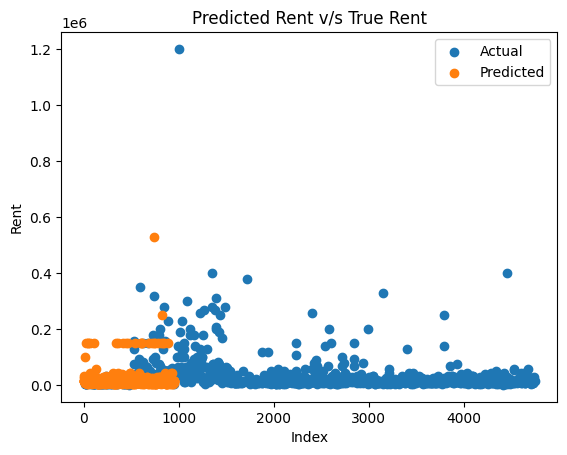

In [41]:
plt.scatter(y=df3['Rent'],x=df3.index)
plt.scatter(y=df6['Predicted Rent'],x=df6.index)
plt.title("Predicted Rent v/s True Rent")
plt.legend(['Actual','Predicted'])
plt.xlabel("Index")
plt.ylabel("Rent")
plt.show()